In [1]:
# Nạp các gói thư viện cần thiết 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Chuẩn bị dữ liệu

In [2]:
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/flowers.csv')
X = df.iloc[:,:].values

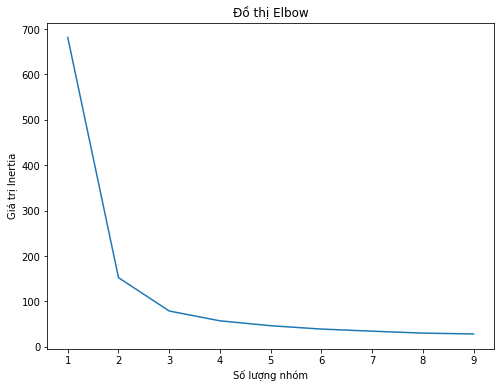

In [3]:
from sklearn.cluster import KMeans
clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    # inertia: tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần gần của chúng
    clusters.append(km.inertia_)

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Đồ thị Elbow')
ax.set_xlabel('Số lượng nhóm')
ax.set_ylabel('Giá trị Inertia')
plt.show()

In [4]:
# Qua đồ thị trên, chúng ta thấy số lượng clusters thích hợp từ 2->4
# ==> Chọn 3 clusters
# Sử dụng TSNE
# Giảm chiều dữ liệu từ 4 -> 2
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
X_  = tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.546581
[t-SNE] KL divergence after 300 iterations: 0.101076


### 2. Thiết lập kích thước figure

In [5]:
plt.rcParams['figure.figsize'] = (14, 7)

### 3. Tiến hành gom nhóm
3.1 Sử dụng **KMEANS**

Nhóm 1: 38
Nhóm 2: 50
Nhóm 3: 62


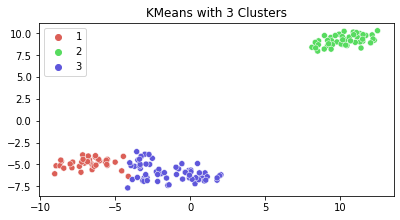

In [6]:
from sklearn.cluster import KMeans 
km3 = KMeans(n_clusters=3, random_state=2020)
y_label = km3.fit_predict(X) + 1
# Vẽ biểu đồ
plt.subplot(2, 2, 1)
sns.scatterplot(X_[:, 0], X_[:, 1],
                hue=y_label,
                palette=sns.color_palette('hls', 3)) 
plt.title('KMeans with 3 Clusters')
print('Nhóm 1:', len(y_label[y_label==1]))
print('Nhóm 2:', len(y_label[y_label==2]))
print('Nhóm 3:', len(y_label[y_label==3]))

3.2. Sử dụng giải thuật **Agglomerative Hierarchical Clustering**

Nhóm 1: 64
Nhóm 2: 50
Nhóm 3: 36


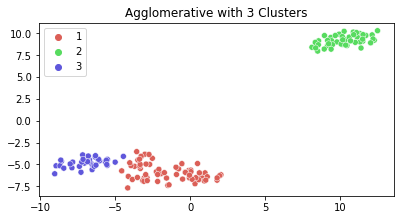

In [7]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
y_label = agglom.fit_predict(X) + 1
# Vẽ biểu đồ
# X['Labels'] = agglom.labels_
plt.subplot(2, 2, 2)
sns.scatterplot(X_[:, 0], X_[:, 1],
                hue=y_label,
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 3 Clusters')
print('Nhóm 1:', len(y_label[y_label==1]))
print('Nhóm 2:', len(y_label[y_label==2]))
print('Nhóm 3:', len(y_label[y_label==3]))


3.3. Sử dụng giải thuật **DBSCAN**

Text(0.5, 1.0, 'DBSCAN with epsilon 11, min samples 6')

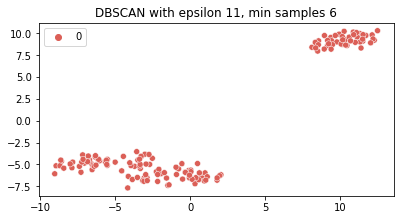

In [8]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=11, min_samples=6)
y_label = db.fit_predict(X)

plt.subplot(2, 2, 3)
sns.scatterplot(X_[:, 0], X_[:, 1],
                hue=y_label,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')

3.4. Sử dụng giải thuật **MeanShift**

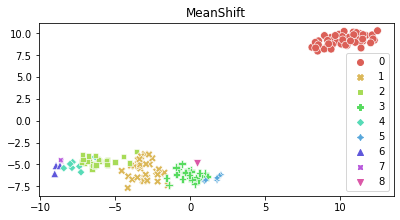

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
y_label = ms.fit_predict(X)

plt.title('DBSCAN with epsilon 11, min samples 6')
plt.subplot(2, 2, 4)
labels = np.unique(ms.labels_)
sns.scatterplot(X_[:, 0], X_[:, 1], 
                hue=y_label, 
                style=y_label, 
                s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift')
plt.show()


### 4. Hiển thị đồ thị 

In [10]:
plt.tight_layout()
plt.show()
# prac-9.py to display 4 figures in one

<Figure size 1008x504 with 0 Axes>

(-0.5, 6999.5, 3499.5, -0.5)

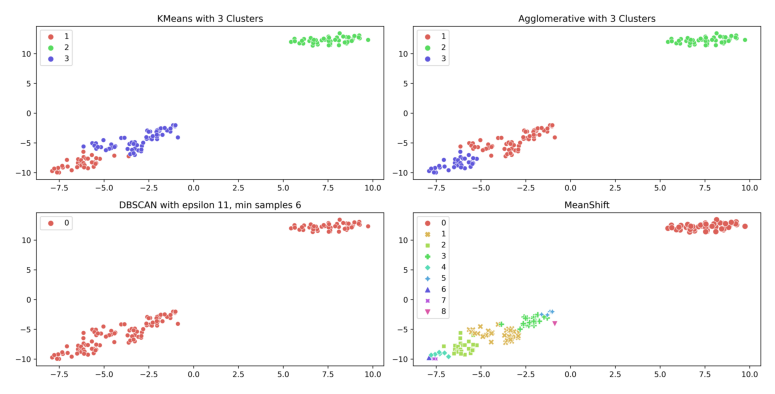

In [11]:
fig = plt.imread('figure9.png')
plt.imshow(fig)
plt.axis('off')

### Nhận xét:
Ta thấy dữ liệu được gom nhóm sử dụng giải thuật **Agglomerative** cho ra kết quả hợp lý hơn so với các giải thuật còn lại